<a href="https://colab.research.google.com/github/JakCrane/NumPy/blob/master/second_cw_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating a Net-Zero Momentum Sector Strategy

We have already seen a Momentum Cross Over strategy in session two.

Now, instead, we will implement a Zero Momentum Basket. Our basket will only contain Equity (Stocks).

A basket here is simply a combination of individual stocks with different weightings

Remember to checkout the old notebooks if you've forgotten any methods from previous weeks:

https://imperialcollegelondon.app.box.com/s/rq3he3gb5mq2tlzzyhxh5q8s3iv82wfg

**1a)** Read in the [AAPL, META, GOOG, AMZN, MSFT, TSLA] Stock Adjusted Close Prices using Yahoo Finance from Start of 2017 - End of 2019 into a DataFrame (df) (1 Mark)

In [ ]:
#!pip install yfinance
import yfinance as yf
df_all = yf.download(["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA" ], start = "2017-01-01", end = "2019-12-31")
df = df_all.loc[:,'Adj Close']
df.head()

#Output head of df

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,GOOG,META,MSFT,TSLA
Date,,,,,,
2017-01-03,27.174749,37.683498,39.306999,116.860001,57.645370,14.466000
2017-01-04,27.144339,37.859001,39.345001,118.690002,57.387444,15.132667
2017-01-05,27.282373,39.022499,39.701000,120.669998,57.387444,15.116667
2017-01-06,27.586531,39.799500,40.307499,123.410004,57.884872,15.267333
2017-01-09,27.839209,39.846001,40.332500,124.900002,57.700638,15.418667


**1b)** Plot the Adjusted Close Prices of these 6 stocks (1 Mark)

[*********************100%***********************]  6 of 6 completed


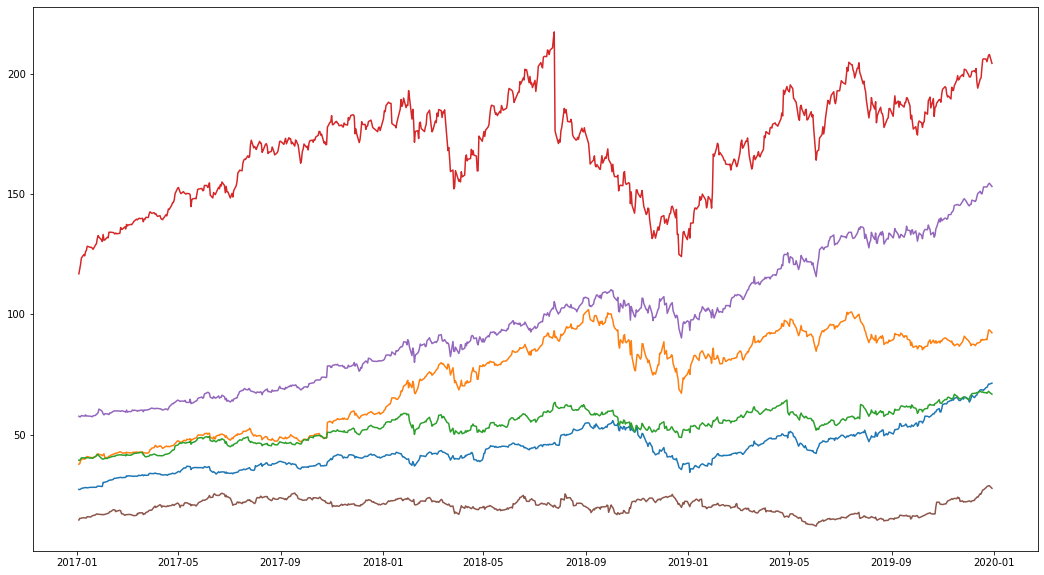

In [ ]:
#Plot

import yfinance as yf
df_all = yf.download(["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA" ], start = "2017-01-01", end = "2019-12-31")
df = df_all.loc[:,'Adj Close']


import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.plot(df)
plt.show()

**1c)** Using the adjusted close of each of the 6 stocks generate the daily log return & show the new head of our df (1 Mark)

In [ ]:
#Output head of df
#!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
tickers = ["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA" ]

df_all = yf.download(tickers, start = "2017-01-01", end = "2019-12-31")
df = df_all.loc[:,'Adj Close']

log_df = pd.DataFrame(np.log(df))

for t in tickers:
    title = "{}_returns".format(t) #log returns
    df[title] = np.log(df[t]/df[t].shift(1))
df.dropna(inplace=True)
df.head()

[*********************100%***********************]  6 of 6 completed


<ipython-input-62-c516dae58bd8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[title] = np.log(df[t]/df[t].shift(1))
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,AAPL,AMZN,GOOG,META,MSFT,TSLA,AAPL_returns,META_returns,GOOG_returns,AMZN_returns,MSFT_returns,TSLA_returns
Date,,,,,,,,,,,,
2017-01-04,27.144339,37.859001,39.345001,118.690002,57.387451,15.132667,-0.001120,0.015538,0.000966,0.004646,-0.004484,0.045055
2017-01-05,27.282377,39.022499,39.701000,120.669998,57.387451,15.116667,0.005072,0.016544,0.009007,0.030270,0.000000,-0.001058
2017-01-06,27.586531,39.799500,40.307499,123.410004,57.884861,15.267333,0.011087,0.022453,0.015161,0.019716,0.008630,0.009918
2017-01-09,27.839209,39.846001,40.332500,124.900002,57.700638,15.418667,0.009118,0.012001,0.000620,0.001168,-0.003188,0.009863
2017-01-10,27.867281,39.794998,40.239498,124.349998,57.682220,15.324667,0.001008,-0.004413,-0.002309,-0.001281,-0.000319,-0.006115


## Creating a Basket

As you can see the stocks perform at varying levels across these 4 years. We will look at trying to create a basket which is "sector neutral" such that it is unaffected by the sectors overall performance.

(Although simpliefied) We can do this by shorting the sector as much as we long it.

For a basket of 6 stocks we will allocate weightings of:

A -> +30%

B -> +15%

C -> +5%

D -> -5%

E -> -15%

F -> -30%

This way we have a total capital allocation of 100% but we have gone long (+)50% and shorted (-)50%. Overall our net position in the sector is 0%.

We can consider the daily returns from an individual stock in the basket (Basket_X_return) by using the formula:

Basket_X_return = Weight(X) * daily_return

Consider Asset E with a +10% daily return:

Basket_E_return = -0.15 x 0.1 = -0.015 = -1.5% return

Here the daily return from asset E in the basket is -1.5%.


2a) Consider the basket:

A = AAPL

B = META

C = GOOG

D = AMZN

E = MSFT

F = TSLA

**2a)** For each Stock Return Column of our df, use the Basket_X_Return formula to create an array/list of daily returns for each stock. What is the total return of our basket? (1 Mark)

In [ ]:
#Print total return
import yfinance as yf
import pandas as pd
import numpy as np
tickers = ["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA" ]
weights = [0.30, 0.15, 0.05, -0.05, -0.15, -0.3]
params = zip(tickers,weights)
df_all = yf.download(tickers, start = "2017-01-01", end = "2019-12-31")

df = df_all.loc[:,'Adj Close']
log_df = pd.DataFrame(np.log(df))
df_log_returns = pd.DataFrame()
df_returns = pd.DataFrame()
weighted_df_returns = pd.DataFrame()
for t, w in params:
    df_log_returns[t] = np.log(df[t]/df[t].shift(1))
    weighted_df_returns[t] = df_log_returns[t]*w 
weighted_df_returns.dropna(inplace=True)
print(weighted_df_returns) #daily weighted returns for each stock
weighted_df_returns.sum().sum() #total return of basket


[*********************100%***********************]  6 of 6 completed
                AAPL      META      GOOG      AMZN      MSFT      TSLA
Date                                                                  
2017-01-04 -0.000336  0.002331  0.000048 -0.000232  0.000673 -0.013516
2017-01-05  0.001522  0.002482  0.000450 -0.001513 -0.000000  0.000317
2017-01-06  0.003326  0.003368  0.000758 -0.000986 -0.001295 -0.002975
2017-01-09  0.002735  0.001800  0.000031 -0.000058  0.000478 -0.002959
2017-01-10  0.000302 -0.000662 -0.000115  0.000064  0.000048  0.001835
...              ...       ...       ...       ...       ...       ...
2019-12-23  0.004856 -0.000087 -0.000028 -0.000182 -0.000000 -0.009916
2019-12-24  0.000285 -0.000773 -0.000196  0.000106  0.000029 -0.004284
2019-12-26  0.005894  0.001940  0.000623 -0.002175 -0.001225 -0.003987
2019-12-27 -0.000114  0.000224 -0.000314 -0.000028 -0.000274  0.000390
2019-12-30  0.001775 -0.002684 -0.000586  0.000616  0.001298  0.011134

[752 ro

0.01444339272338413

**2b)** Plot the Cumulative Return of our model vs the individual stocks (1 Mark)

[*********************100%***********************]  6 of 6 completed


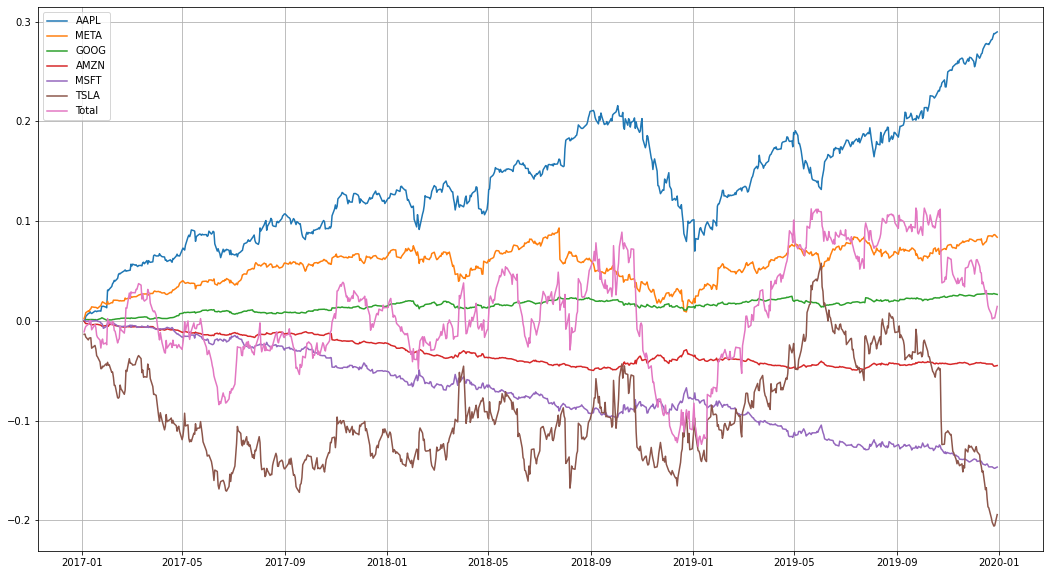

In [ ]:
#Output plot of Cumulative return
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tickers = ["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA" ]
ctickers = []
weights = [0.30, 0.15, 0.05, -0.05, -0.15, -0.3]
params = zip(tickers,weights)
df_all = yf.download(tickers, start = "2017-01-01", end = "2019-12-31")

df = df_all.loc[:,'Adj Close']
log_df = pd.DataFrame(np.log(df))
df_log_returns = pd.DataFrame()
weighted_df_returns = pd.DataFrame()
weighted_df_c_returns = pd.DataFrame()
df_log_returns[tickers] = np.log(df[tickers]/df[tickers].shift(1))
weighted_df_returns[tickers] = df_log_returns[tickers]*weights   
weighted_df_returns.dropna(inplace=True)
weighted_df_returns['Total'] = weighted_df_returns.sum(axis=1)

for t in ["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA",'Total']:
    title = "C_{}".format(t)
    ctickers.append(title)
    weighted_df_c_returns[title] = weighted_df_returns[t].cumsum()

plt.figure(figsize=(18,10))
plt.grid()
plt.plot(weighted_df_c_returns)
plt.legend(["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA",'Total'])
plt.show()

## Finding the Optimum Allocation

We have considered one possible combination our 6 stocks in the 6 slots (A-F)

**3a)** How many possible allocations are there for our 6 stocks in the 6 slots? (1 Mark)

In [7]:
#Print number of allocations
import math as m
m.factorial(6)

720

Using combinations function for finding all variations.

Documentation: https://docs.python.org/3/library/itertools.html#itertools.combinations

**3b)** Generate all variations (1 Mark)

In [8]:
from itertools import permutations
import pandas as pd

pd.DataFrame(permutations(["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA"]))



,0,1,2,3,4,5
0,AAPL,META,GOOG,AMZN,MSFT,TSLA
1,AAPL,META,GOOG,AMZN,TSLA,MSFT
2,AAPL,META,GOOG,MSFT,AMZN,TSLA
3,AAPL,META,GOOG,MSFT,TSLA,AMZN
4,AAPL,META,GOOG,TSLA,AMZN,MSFT
...,...,...,...,...,...,...
715,TSLA,MSFT,AMZN,AAPL,GOOG,META
716,TSLA,MSFT,AMZN,META,AAPL,GOOG
717,TSLA,MSFT,AMZN,META,GOOG,AAPL
718,TSLA,MSFT,AMZN,GOOG,AAPL,META


**3c)** Iterate through each possible basket & save the total basket return, which arrangement generates the optimum log return? (2 Marks)

In [12]:
#Print Optimum Arrangement & it's return
from itertools import permutations
import pandas as pd
perm = pd.DataFrame( permutations(["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA"]))
a = pd.DataFrame( permutations([0.965994, 0.559151, 0.530405, 0.896304, 0.977475, 0.647704]))
b = pd.DataFrame()
c = pd.DataFrame()
w = [0.30, 0.15, 0.05, -0.05, -0.15, -0.3]
for i in range(6):
  b[i] = a.loc[:,i]*w[i]
c['Num'] = range(720)
c['Val'] = b.sum(axis=1) #saved total basket returns

fml = c.loc[c['Val'].idxmax()]
perm.loc[fml['Num']] #where 0 = 0.3, 1 = 0.15, 2 = 0.05, 3 = -0.05, 4 = -0.15, 5 = -0.30

0    MSFT
1    AAPL
2    AMZN
3    TSLA
4    META
5    GOOG
Name: 496, dtype: object

## Improving Our Strategy

**4)** For the chance to get 11/10: Recommend another way we could try and optimise a zero momentum basket. No right answers!

i.e. iterate through different possible A-F weightings ([+25%, +15%, +10%...]). 

In [6]:
#Print Optimum Arrangement & it's return
from itertools import permutations
import pandas as pd
perm = pd.DataFrame( permutations(["AAPL", "META", "GOOG", "AMZN", "MSFT", "TSLA"]))
a = pd.DataFrame( permutations([0.965994, 0.559151, 0.530405, 0.896304, 0.977475, 0.647704]))
b = pd.DataFrame()
c = pd.DataFrame()
w = [0.5,-0.5,0,0,0,0]
for i in range(6):
  b[i] = a.loc[:,i]*w[i]
c['Num'] = range(720)
c['Val'] = b.sum(axis=1)

fml = c.loc[c['Val'].idxmax()]
print(perm.loc[fml['Num']])
print(fml['Val'])

0    MSFT
1    GOOG
2    AAPL
3    META
4    AMZN
5    TSLA
Name: 528, dtype: object
0.22353499999999998
